## Cat Dog Dataset

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

You can obtain the dataset from https://www.kaggle.com/c/dogs-vs-cats/data

This case study is adopted from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

### 1. Import Library

In [14]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import random
from _data_new import organise_images_in_folders
import os, logging, glob
from _logging import set_logging
from _utility import get_perc

set_logging(logging)

organise_images_flag = False
data_folder = "cats_dogs_small"
classes = ["cat", "dog"]
dict_classes = {"cat": 0, "dog": 1}
if organise_images_flag:
    organise_images_in_folders(data_folder, classes)

#class of gpu
class gpu:
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

# class of hyperparameters
class hyper:
    lr = 0.01
    batch_size = 100
    epochs = 10
    


### 2. Define Constants

In [15]:
FAST_RUN = True #False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### 3. Prepare Traning Data

In [16]:
def get_data(data_folder, type):
    file_path = os.path.join(data_folder, "data", type, "*\\*")
    list = glob.glob(file_path)
    X_list = random.sample(list, len(list))
    labels = []
    for item in X_list:
        temp = item.split(".")
        labels.append(dict_classes["cat"] if temp[0].endswith("cat") else dict_classes["dog"])
        
    return X_list, labels
        
        

In [17]:
X_train, y_train = get_data(data_folder, "train")
X_test, y_test = get_data(data_folder, "test")
dogs_perc_train = get_perc(sum(y_train), len(y_train))
dogs_perc_test = get_perc(sum(y_test), len(y_test))
logging.info(f"{dogs_perc_train}\% of the training images are labelled as dogs")
logging.info(f"{dogs_perc_test}\% of the test images labelled as dogs")
# get labels

2023-01-20 20:55:43,540 | INFO : 50.24\% of the training images are labelled as dogs
2023-01-20 20:55:43,542 | INFO : 50.24\% of the test images labelled as dogs


#### See Total In count

In [18]:
number_dogs = sum(y_train) + sum(y_test)
number_cats = len(y_train) + len(y_test) - number_dogs
logging.info(f"From our data we have {number_cats} cats and {number_dogs} dogs")

2023-01-20 20:55:43,597 | INFO : From our data we have 1264 cats and 1276 dogs


#### See sample image

2023-01-20 21:03:02,022 | INFO : 1 cats_dogs_small\data\train\cat\cat.11483.jpg
2023-01-20 21:03:02,215 | INFO : 2 cats_dogs_small\data\train\cat\cat.10000.jpg
2023-01-20 21:03:02,287 | INFO : 3 cats_dogs_small\data\train\cat\cat.872.jpg
2023-01-20 21:03:02,384 | INFO : 4 cats_dogs_small\data\train\cat\cat.9108.jpg
2023-01-20 21:03:02,469 | INFO : 5 cats_dogs_small\data\train\dog\dog.7465.jpg
2023-01-20 21:03:02,531 | INFO : 6 cats_dogs_small\data\train\cat\cat.5994.jpg
2023-01-20 21:03:02,588 | INFO : 7 cats_dogs_small\data\train\cat\cat.1607.jpg
2023-01-20 21:03:02,640 | INFO : 8 cats_dogs_small\data\train\cat\cat.4727.jpg
2023-01-20 21:03:02,695 | INFO : 9 cats_dogs_small\data\train\cat\cat.10463.jpg
2023-01-20 21:03:02,771 | INFO : 10 cats_dogs_small\data\train\cat\cat.1525.jpg


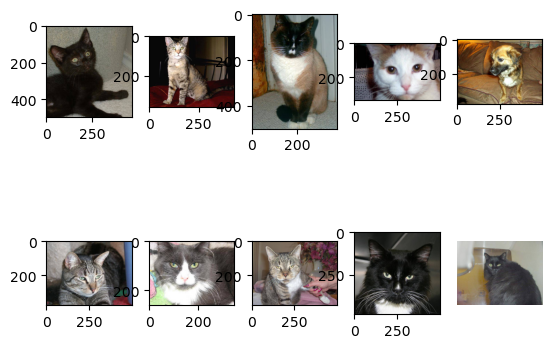

In [20]:
random_idx = np.random.randint(0, len(X_train) - 1, size=10)

fig = plt.figure()
for i, idx in enumerate(random_idx, start = 1):
    logging.info(f"{i} {X_train[idx]}")
    ax = fig.add_subplot(2,5,i)
    img = Image.open(X_train[idx])
    plt.imshow(img)

plt.axis('off')
plt.show()